In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..','..')))
from src.TotalCalculation import *
from src.preprocessing import *
import os
from datetime import datetime as dt
from src.ConstructDataset import Builddataset
from IPython.display import display, HTML

In [3]:
filename = image.getFilename(path=r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Astropark_Chaingmai\2023-12\2023-12-21')
img = [cv2.cvtColor(cv2.imread(f),cv2.COLOR_BGR2RGB) for f in filename]
print(filename)

NameError: name 'cv2' is not defined

In [6]:
filetime = []
extract_name = lambda x : int(os.path.splitext(os.path.basename(x))[0])
filetime = [extract_name(i) for i in filename]
decimal = [timeConvertion().datetime_to_decimal(time=timeConvertion().ticks_to_datetime(ticks=t,time_zone=7)) for t in filetime]
print(decimal)

[0.0044444444444444444, 0.07666666666666666, 0.14888888888888888, 0.22138888888888889, 0.2936111111111111, 0.3658333333333333, 0.4380555555555556, 0.5102777777777778, 0.5852777777777778, 0.6575, 0.73, 0.8022222222222223, 0.8744444444444445, 0.9466666666666667, 1.0188888888888887, 1.0911111111111111, 1.1633333333333333, 1.2355555555555555, 1.3105555555555557, 1.3830555555555555, 1.4552777777777777, 1.5274999999999999, 1.5997222222222223, 1.6719444444444442, 1.7441666666666666, 1.8163888888888888, 1.8888888888888888, 1.961111111111111, 2.036111111111111, 2.1083333333333334, 2.1805555555555554, 2.2527777777777778, 2.3249999999999997, 2.3975, 2.4697222222222224, 2.5419444444444443, 2.6141666666666667, 2.686388888888889, 2.761388888888889, 2.8336111111111113, 2.9058333333333333, 2.9783333333333335, 3.0505555555555555, 3.122777777777778, 3.195, 3.2672222222222222, 3.3394444444444447, 3.4116666666666666, 3.486666666666667, 3.5588888888888888, 3.631388888888889, 3.7036111111111114, 3.775833333

In [7]:
decimal = []
for i in filetime:    
    t = timeConvertion().ticks_to_datetime(ticks=i,time_zone=7)
    decimal.append(timeConvertion().datetime_to_decimal(time=t))

In [8]:
start_date = str(dt(t.year,1,1).date())
sunrise,sunset = SunPosition().SunriseSunset(location=[18.849417,98.9538],Time_zone=7,filename=filetime[7],start_date=start_date,include_end_date=True)
print(sunrise,sunset)

6.947767863969808 17.812304489132117


In [9]:
filtering = lambda x : (x > sunrise) & (x < sunset)
day_indices = [index for index, value in enumerate(decimal) if filtering(value)]
night_indices = [index for index, value in enumerate(decimal) if not filtering(value)]

In [10]:
Day_filename = [filename[i] for i in day_indices]
night_filename = [filename[i] for i in night_indices]

In [11]:
Day_filename,night_filename = image.extract_filename(filename=filename,sunrise=sunrise,sunset=sunset,time_zone=7)

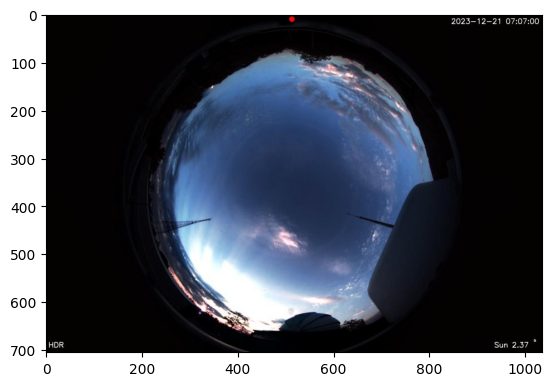

In [12]:
import cv2
from matplotlib import pyplot as plt
im = 3
images = []
images = [cv2.imread(i) for i in Day_filename]
images = [cv2.cvtColor(i,cv2.COLOR_BGR2RGB) for i in images]
plt.imshow(images[im])

In [13]:
crop_image = [preprocessData().crop_center(img=i,crop_size=570) for i in images]
Blue = [cv2.split(i)[2] for i in crop_image]
skewness = [preprocessData().calculate_skewness(data=B) for B in Blue]

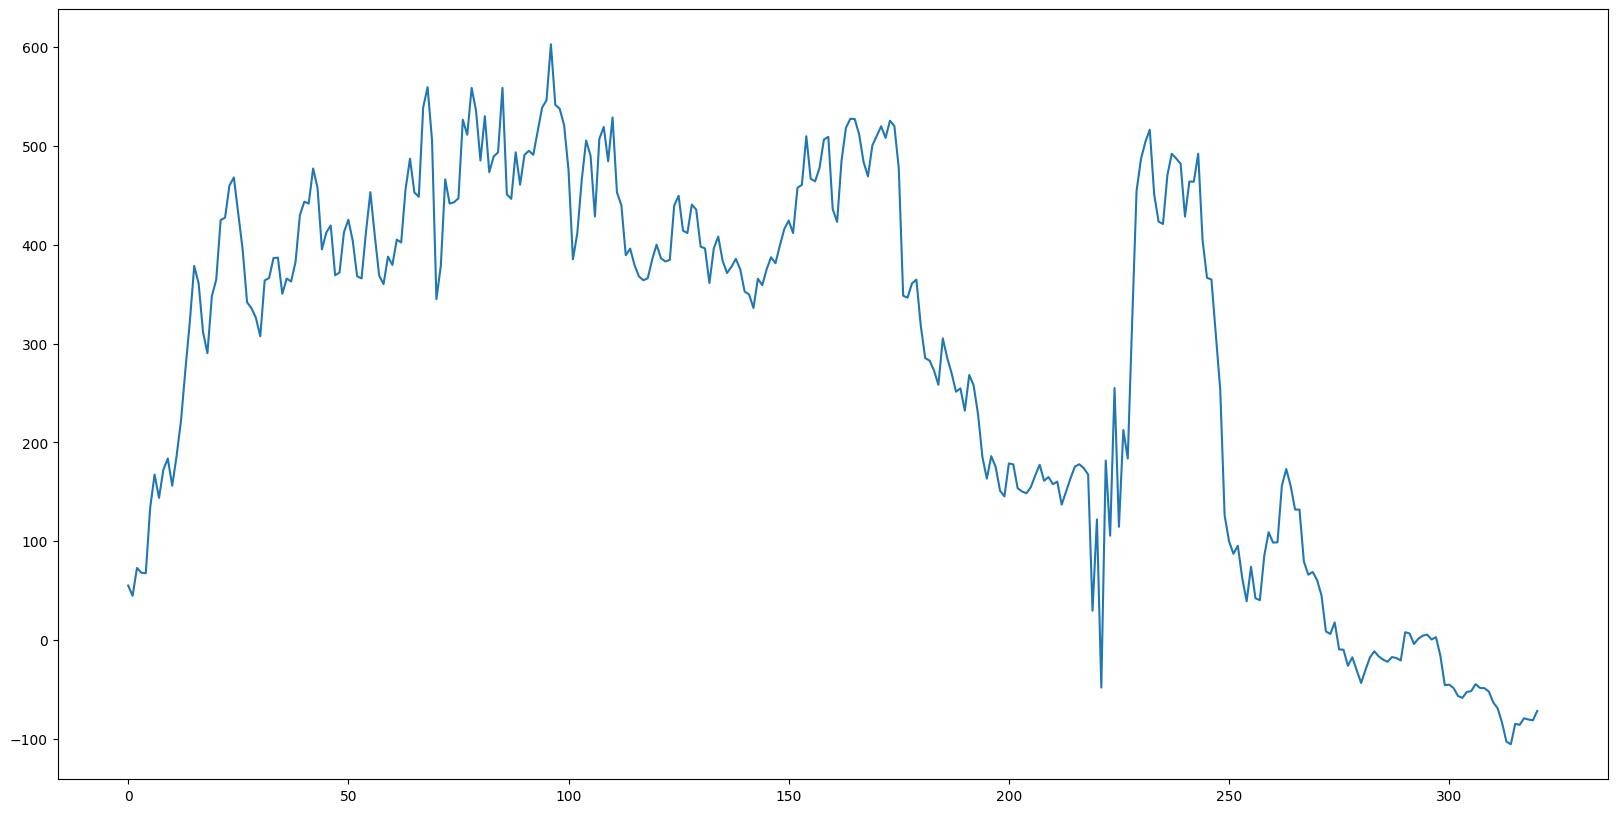

In [14]:
plt.figure(figsize=(20,10))
plt.plot(skewness)

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
df = pd.read_csv(r'C:\Users\ASUS\Documents\NARIT_internship_data\Output_HTML\Astropark\Astropark_Output.csv')

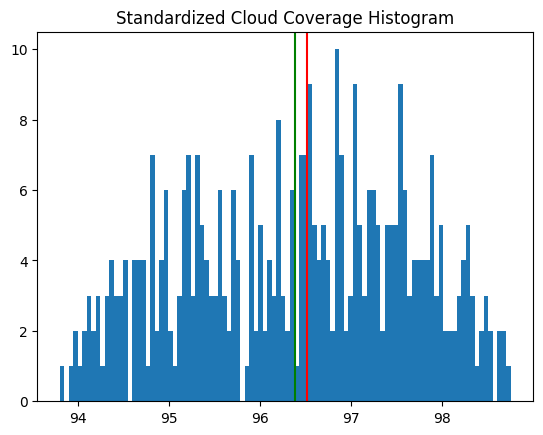

Mean :  Cloud_coverage %    96.387873
dtype: float64


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [16]:
std = StandardScaler()
clarity = df[['Cloud_coverage %']]
x = np.array(std.fit_transform(clarity)).reshape(-1, 1)

# Plot histogram of the standardized data
plt.hist(x=np.array(clarity), bins=100)
plt.axvline(np.median(np.array(clarity)),c='r')
plt.axvline(np.mean(np.array(clarity)),c='g')
plt.title('Standardized Cloud Coverage Histogram')
plt.show()

print("Mean : ", np.mean(clarity))


In [17]:
df["Cloud_coverage %"].describe()

count    373.000000
mean      96.387873
std        1.236955
min       93.802802
25%       95.331114
50%       96.515842
75%       97.397938
max       98.750978
Name: Cloud_coverage %, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa09edc370>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa09edc8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa09edc0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa09edcdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa09edd090>],
 'means': []}

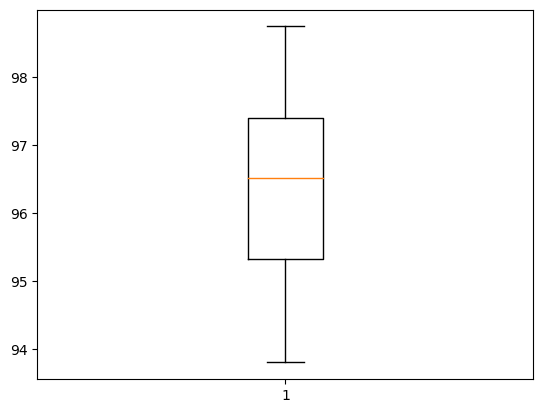

In [18]:
plt.boxplot(df['Cloud_coverage %'])

import pickle 

with open(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\models\PCA\PCA_2.pkl','rb') as pca:
    PCA = pickle.load(pca)
with open(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\models\Scaler\StandardScaler.pkl','rb') as scaler:
    Scaler = pickle.load(scaler)
with open(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\models\kmean_model_2PCA.pkl','rb') as kmean:
    Kmean = pickle.load(kmean)

In [19]:
import pandas as pd
import numpy as np

output = pd.read_csv(r'C:\Users\ASUS\Documents\NARIT_internship_data\Output_HTML\Astropark\Astropark_Output.csv')

In [20]:
values = pd.value_counts(output['Kmean_clustering'])
print("Different classes : ",np.unique(output['Kmean_clustering']))
print("Each class count : ",values)
print("percentage for each class : ",values/len(output))

Different classes :  [2]
Each class count :  2    373
Name: Kmean_clustering, dtype: int64
percentage for each class :  2    1.0
Name: Kmean_clustering, dtype: float64


In [21]:
values = pd.value_counts(output['GMM_model'])
print("Different classes : ",np.unique(output['GMM_model']))
print("Each class count : ",values)
print("percentage for each class : ",values/len(output))

Different classes :  [1]
Each class count :  1    373
Name: GMM_model, dtype: int64
percentage for each class :  1    1.0
Name: GMM_model, dtype: float64


In [22]:
df1 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_1,0')
df2 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_2,0')
df3 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_3,0')
df4 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_4,0')
df5 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_1,45')
df6 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_2,45')
df7 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_3,45')
df8 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_4,45')
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [23]:
df

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,intensity,Red channel,Blue channel,skewness,std,different(R-B),label
638529654113325820,127.297826,1.823464,0.731969,0.272523,0.982644,0.074269,92.453841,39.669760,92.453841,260.268095,77.628997,-52.784081,Clear
638529655313754106,139.675343,2.038079,0.702889,0.273775,0.981577,0.074953,88.668163,40.546337,88.668163,320.416404,76.435384,-48.121825,Clear
638531382127090396,72.928123,0.875738,0.848392,0.283339,0.989436,0.080281,94.289711,37.473620,94.289711,230.225469,75.976251,-56.816091,Clear
638531383327998900,76.707600,0.910973,0.838897,0.283940,0.988965,0.080622,90.215731,38.907064,90.215731,291.223374,74.279374,-51.308667,Clear
638531384528879471,72.275738,0.929226,0.827281,0.283194,0.989582,0.080199,88.310465,39.799160,88.310465,318.210252,73.335230,-48.511305,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
638552452925538933,967.732096,12.874730,0.425494,0.264472,0.895593,0.069946,77.561616,43.261296,77.561616,539.744239,78.912796,-34.300320,Partly cloudy
638552458328144744,1014.890873,13.572866,0.414859,0.246255,0.905225,0.060641,80.284081,45.052979,80.284081,536.826431,81.026898,-35.231102,Partly cloudy
638552461328475346,1011.537726,12.566976,0.457548,0.264899,0.895071,0.070172,76.766845,43.211570,76.766845,546.991421,79.184953,-33.555275,Partly cloudy
638552463129012533,980.755766,12.069507,0.459672,0.258764,0.907559,0.066959,90.886762,48.925611,90.886762,10.642213,67.723973,-41.961151,Partly cloudy


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.calibration import CalibratedClassifierCV
scaler = StandardScaler()
scaler.fit(df.drop(columns=['label']))
scaled = scaler.transform(df.drop(columns=['label']))
X = scaled
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [25]:
#knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',metric='minkowski',leaf_size=30)
from sklearn.ensemble import RandomForestClassifier

#knn = LogisticRegression(penalty='l2',solver='newton-cg',random_state=42)
knn = RandomForestClassifier(n_estimators=200,criterion='entropy')
knn.fit(X_train,y_train)
calibrated = CalibratedClassifierCV(estimator=knn,method='sigmoid')
calibrated.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(knn.score(X_test,y_test))

0.9952038369304557


<Figure size 2000x2000 with 0 Axes>

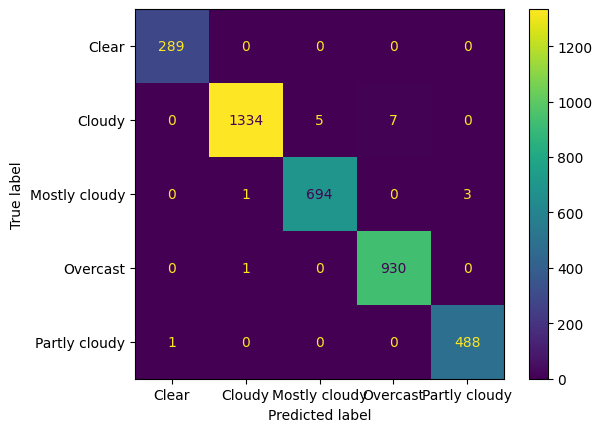

In [26]:
labels = ['Clear','Cloudy','Mostly cloudy','Overcast','Partly cloudy']
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
plt.figure(figsize=(20,20))
disp.plot(cmap=plt.cm.viridis)
plt.show()

In [27]:
print(classification_report(y_test,y_pred_knn))

               precision    recall  f1-score   support

        Clear       1.00      1.00      1.00       289
       Cloudy       1.00      0.99      0.99      1346
Mostly cloudy       0.99      0.99      0.99       698
     Overcast       0.99      1.00      1.00       931
Partly cloudy       0.99      1.00      1.00       489

     accuracy                           1.00      3753
    macro avg       0.99      1.00      1.00      3753
 weighted avg       1.00      1.00      1.00      3753



In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=10)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.99437537 0.9920071  0.99111901 0.99496744 0.99319124 0.99230086
 0.98933965 0.99526207 0.99318922 0.99230086]
Mean accuracy: 0.9928052810140973


In [29]:
filtering = lambda x : (x > sunrise) & (x < sunset)
#decimal = [timeConvertion().datetime_to_decimal(time=timeConvertion().ticks_to_datetime(ticks=t,time_zone=7)) for t in filename]
#day_indices = [index for index, value in enumerate(decimal) if filtering(value)]
#night_indices = [index for index, value in enumerate(decimal) if not filtering(value)]

In [1]:
from src.ClassPrediction import visualizer
from src.preprocessing import preprocessData

mask_path = r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\masks\International Observatories\Mask_Chile_new.png'
image_path = r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Chile\2024-07\2024-07-25'
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
mask = preprocessData().crop_center(mask, crop_size=570)
images,filename = preprocessData().load_images_and_preprocess(image_path,mask=mask,apply_crop_sun=False)
sunrise,sunset = SunPosition().SunriseSunset(filename=filename[50],location=[-30.16776,-70.80516],Time_zone=-4,start_date=start_date,include_end_date=True)
masked,value,statisical = thresholding().RBratio(input=images,filename=filename,sunrise=sunrise,sunset=sunset,Time_zone=-4)
gray = [cv2.cvtColor(i,cv2.COLOR_RGB2GRAY) for i in images]
glcm = preprocessData().computeGlcm(image=gray,distance=[int(2)],angle=[int(0)])
test = preprocessData().getDataframe(properties,glcm,index=filename,intensity=value,statistical=statisical)
scaler_predict = scaler.transform(test)

prediction = knn.predict_proba(scaler_predict)
prediction = [list(map(lambda x: round(x, 4), prob)) for prob in prediction]
predict_frame = pd.DataFrame(data=None,index=filename)
time = [timeConvertion().ticks_to_datetime(i,time_zone=-4) for i in predict_frame.index]
predict_frame["Time"] = time
predict_frame["Prob %"] = [prediction[num] for num in range(len(prediction))]
predict_frame["Percent"] = [np.max(prediction[num]) for num in range(len(prediction))]
predict_frame['Label'] = knn.predict(scaler_predict)
predict_frame["Cloud_ratio"] = [preprocessData().showCloudRatio(masked,mask,num) for num,_ in enumerate(masked)]
images = [cv2.cvtColor(i,cv2.COLOR_RGB2BGR) for i in images]
images_64 = [visualizer().image_to_base64(i) for i in images]
predict_frame['Raw image'] = [visualizer().image_html(i, size=[200,200]) for i in images_64]

ModuleNotFoundError: No module named 'src'

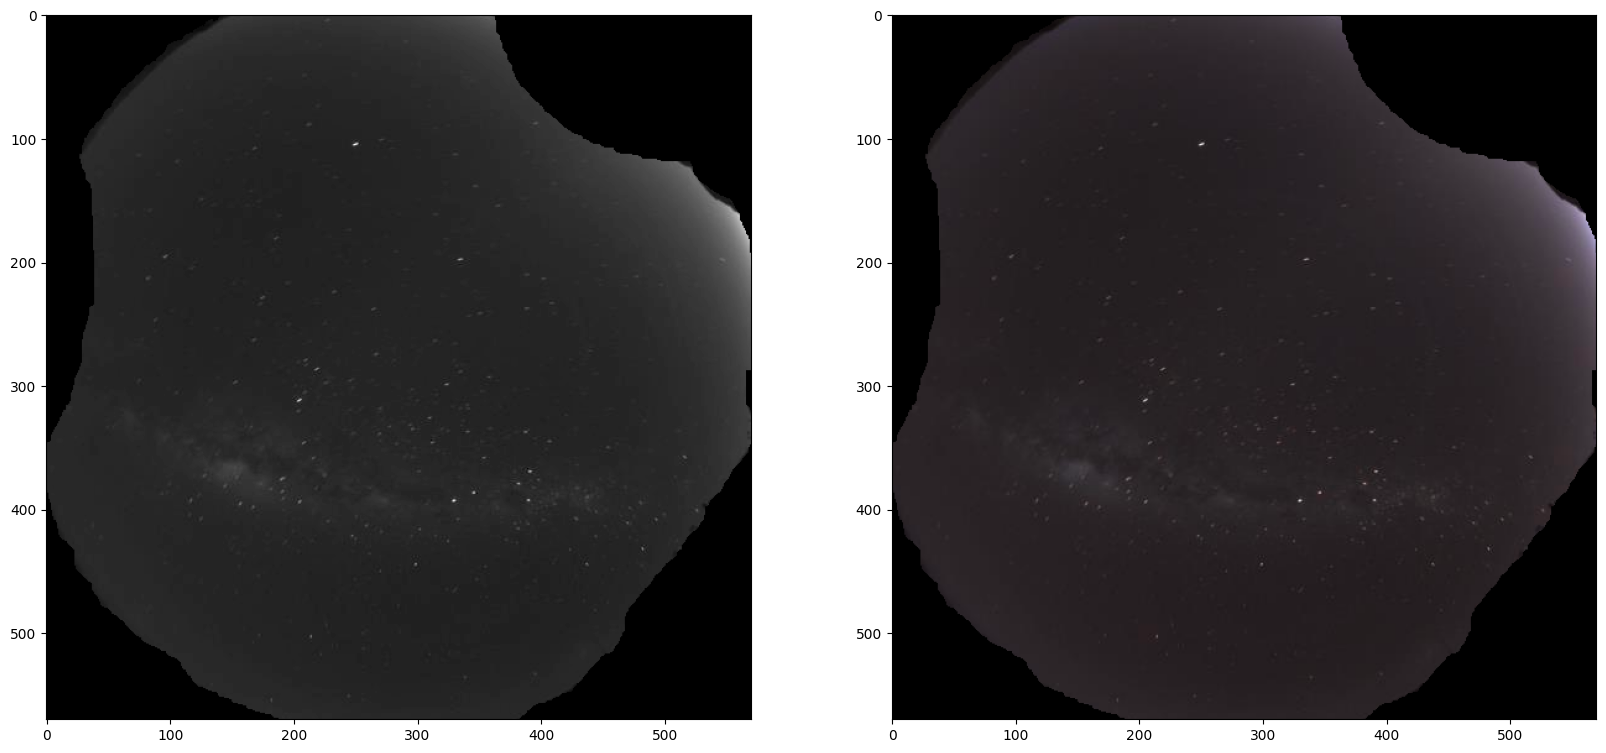

In [33]:
num = 180
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(masked[num],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(images[num])

In [34]:
pd.value_counts(predict_frame['Label'])

Partly cloudy    206
Cloudy           200
Clear            108
Mostly cloudy      6
Overcast           2
Name: Label, dtype: int64

In [35]:
#data tends to have some pattern recognition on clear (Not good) ----> add more data on clear with different pattern || solved###!
#Model a little bit overfitting

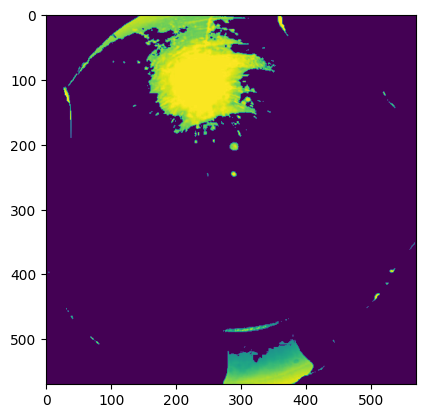

In [36]:
plt.imshow(masked[2])

In [37]:
from skl2onnx import to_onnx

onx = to_onnx(knn, X[:1])
with open("RandomForest.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [38]:
import onnxruntime as rt
sess = rt.InferenceSession(r"C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\Test\Test_kernel\RandomForest.onnx", providers=["CPUExecutionProvider"])
input_name = sess.get_inputs()[0].name
probability_name = sess.get_outputs()[0].name

run_options = rt.RunOptions()
run_options.log_severity_level = 0

pred_probabilities = sess.run([probability_name], {input_name: X_test.astype(np.float64)},run_options=run_options)[0]

In [39]:
onnx_acc = accuracy_score(pred_probabilities,y_test)
model_acc = accuracy_score(y_pred_knn,y_test)

percent_error = (np.abs(onnx_acc-model_acc)/model_acc) * 100
print(f"Different : {percent_error} %")

Different : 0.0 %


In [40]:
import os

img_dir = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical'
df = list()
folders = os.listdir(img_dir)
for folder in folders:
    subfolder = os.path.join(img_dir,folder)
    df.append(Builddataset().concateDataset(folder_name=subfolder))
dataframe = pd.concat(df)